In [1]:
from pytorch_grad_cam import (
    GradCAM, 
    HiResCAM, 
    ScoreCAM, 
    GradCAMPlusPlus, 
    AblationCAM, 
    XGradCAM, 
    EigenCAM, 
    FullGrad, 
    EigenGradCAM, 
    LayerCAM
)
from fastai.vision.all import *
from fastai.vision import *

In [2]:
Methods = (
    GradCAM, 
    HiResCAM, 
    ScoreCAM, 
    GradCAMPlusPlus, 
    AblationCAM, 
    XGradCAM, 
    EigenCAM, 
    FullGrad, 
    EigenGradCAM, 
    LayerCAM
)

In [325]:
path = './data/random_pet_one'
torch.manual_seed(43052)
dls = ImageDataLoaders.from_name_func(
    path = path,
    fnames = get_image_files(path),
    label_func = lambda x: "cat" if x[0].isupper() else "dog",
    item_tfms = Resize(512),
    batch_tfms=ToTensor(),
    num_workers = 0
)
lrnr = vision_learner(dls,resnet34,metrics=error_rate)
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.153393,0.005823,0.002030,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.001834,0.000006,0.000000,00:45


In [326]:
img_idx = 1

In [327]:
img_norm, = next(iter(dls.test_dl([PILImage.create(get_image_files(path)[img_idx])])))
img = dls.train.decode((img_norm,))[0]

100%|████████████████████████████████████| 16/16 [00:00<00:00, 26.46it/s]


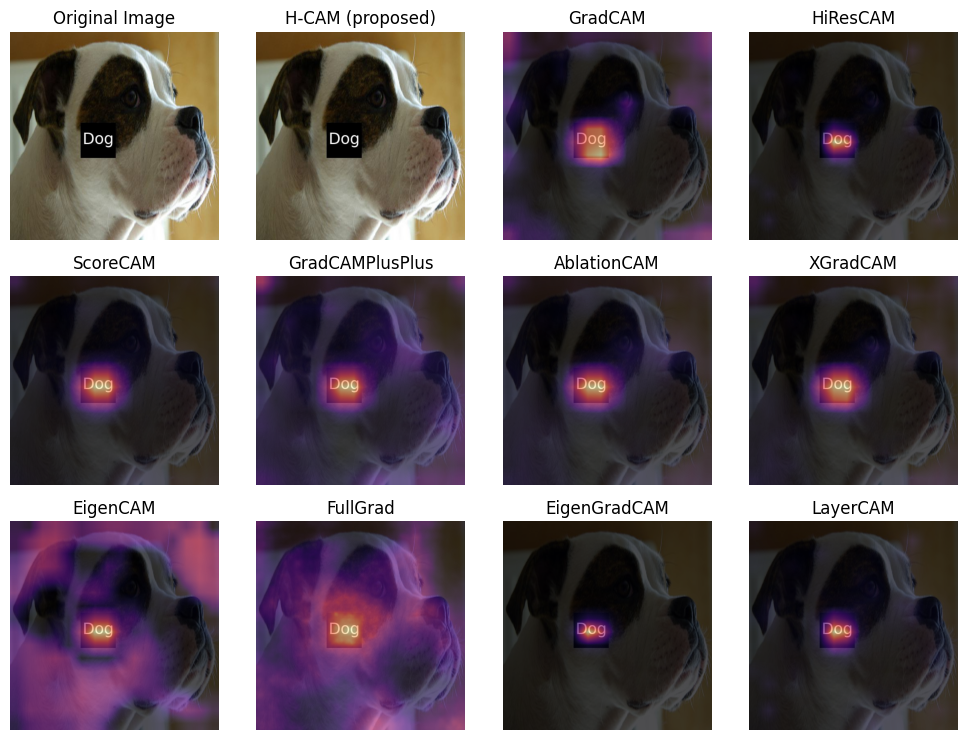

In [328]:
fig, axs = plt.subplots(3,4)
for ax in axs.flatten():
    img.squeeze().show(ax=ax)
axs[0][0].set_title("Original Image")
axs[0][1].set_title("H-CAM (proposed)")
for ax,method in zip(axs.flatten()[2:], Methods):
    cam = method(model=lrnr.model, target_layers=lrnr.model[0][-1])(input_tensor=img_norm,targets=None)
    ax.imshow(cam.squeeze(), alpha=0.7, cmap="magma")
    ax.set_title(f"{method.__name__}")
fig.set_figwidth(10)            
fig.set_figheight(7.5)
fig.tight_layout()

/tmp/ipykernel_377599/264565080.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  res_img = img*weight / (img*weight).max()


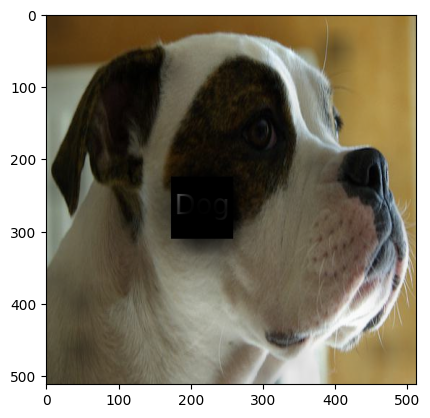

In [329]:
k = 0.03/cam.std()**2 
weight = np.exp(-k*cam)
res_img = img*weight / (img*weight).max()
plt.imshow(res_img.squeeze().permute(1,2,0))

In [ ]:
# for i in range(len(dls.train_ds)):
#     x, y = dls.train_ds[i]
#     # x는 PILImage 타입
#     torchvision.transforms.ToPILImage()(res_img.squeeze())
#     x_new = x.rotate(45)  # 예: 회전시키기
#     x_new.show()
#     # 만약 저장하고 싶다면
#     # x_new.save(f"modified_image_{i}.png")

In [ ]:
import torchvision

In [ ]:
torchvision.transforms.ToPILImage()(res_img.squeeze())

In [ ]:
dls.train_ds[0][0]

In [ ]:
res_img